In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
names = open('modified.names').read().split('\n')

In [4]:
df = pd.read_csv('spambase.data',names=names)

In [5]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [10]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [13]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

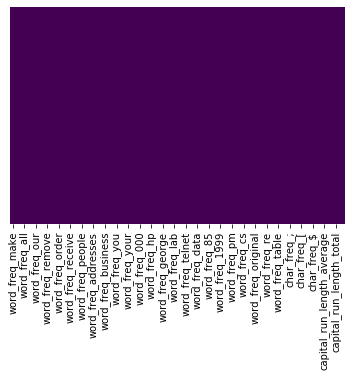

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.iloc[:,:57]
y = df['spam']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train,y_train)

Z:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       886
           1       0.94      0.90      0.92       633

    accuracy                           0.93      1519
   macro avg       0.93      0.93      0.93      1519
weighted avg       0.93      0.93      0.93      1519



In [55]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions)}')

Confusion Matrix: 
[[847  39]
 [ 65 568]]
Area Under Curve: 0.9266481586483084


Gaussian Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [41]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83       886
           1       0.72      0.95      0.82       633

    accuracy                           0.82      1519
   macro avg       0.84      0.84      0.82      1519
weighted avg       0.85      0.82      0.82      1519



In [58]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

Confusion Matrix: 
[[649 237]
 [ 32 601]]
Area Under Curve: 0.8409763603750102


In [46]:
w = {0:39.4, 1:60.6}
logmodel2 = LogisticRegression(class_weight=w)

In [47]:
logmodel2.fit(X_train, y_train)

Z:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 39.4, 1: 60.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predictions2 = logmodel2.predict(X_test)

In [49]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       886
           1       0.90      0.91      0.91       633

    accuracy                           0.92      1519
   macro avg       0.92      0.92      0.92      1519
weighted avg       0.92      0.92      0.92      1519



In [60]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, predictions2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, predictions2)}')

Confusion Matrix: 
[[825  61]
 [ 54 579]]
Area Under Curve: 0.9229215923314755


In [61]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()


In [62]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y_pred_n = neigh.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       886
           1       0.77      0.70      0.73       633

    accuracy                           0.79      1519
   macro avg       0.78      0.77      0.78      1519
weighted avg       0.79      0.79      0.79      1519



In [65]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_n)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_n)}')

Confusion Matrix: 
[[756 130]
 [193 440]]
Area Under Curve: 0.7741879116607647
